# Análisis de los resultados del modelado

Como se tienen dos modelos distintos. Uno para grado y otro para máster. Quiero que se compruebe lo mismo para cada uno de los conjunto de datos:

1. Comprobar el porcentaje de acierto (accuracy) global y el AUC
2. Comprobar la tasa de matriculación y la media de la probabilidad de matrícula. Tanto en general, como por top 5 de titulaciones. ESTO ES MUY INTERESANTE porque se vería genial cómo funciona le modelo.
3. Comprobar el pocentaje de acierto y el AUC por Etapa y Subetapa (concatenadas). ¿Va aumentando conforme las etapas se van acercando a la matriculación?
4. Comprobar el pocentaje de acierto por el top 5 de titulaciones con más oportunidades ¿Acierta muchos en las titulaciones como Medicina, Enfermería, etc?
5. Comprobar las titulaciones con menos porcentaje de acierto. ¿En las que falla, es porque hay pocas oportunidades?

Nota: Aquí puedes utilizar gráficos boxplot y, gráficos boxplot con densidades para algún caso de alguna titulación que quieras mirar en concreto. O para mirar cómo se distribuyen las probabilidades.

Si tienes alguna duda en conceptos de Accuracy o AUC puedes comprobar en el código de Miguel cómo se construye. Pero básicamente:

AUC: Área bajo la curva ROC. Es un indicador de lo bien o mal que separa el modelo entre Matriculados y no matriculados. Cuanto más cercano a 1, mejor separa y mejor es el modelo. A Miguel le sale un AUC de 0.88 - 0.9.

Accuracy: Porcentaje de acierto. No tiene más misterio.

# GRADO

### Carga de los datos

In [2]:
import pandas as pd

# Cargar el Excel (única hoja)
df_grado = pd.read_excel(r"C:\Users\0021878\Downloads\test_grado_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_grado

,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,NU_RESULTADO_ADMISION_PUNTOS,PL_RESOLUCION_DEFINITIVA,TITULACION,...,tiempo_etapa_dias,tiempo_entre_etapas_dias,num_asistencias_acum,num_solicitudes_acum,PCA1,PCA2,cluster,interpretacion_cluster,probabilidad_matricula,prediction_label
0,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,1097,1097,0,0,-9.925818,34.478101,0,Perfil mixto / no dominante,0.0000,0
1,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,93,93,0,0,-2.923296,2.295669,0,Perfil mixto / no dominante,0.0000,0
2,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,0,0,0,0,-2.274656,-0.685373,0,Perfil mixto / no dominante,0.0014,0
3,0,0,2025/2026,True,0.0,0.0,False,0.0,Admitido,Máster en Big Data Science,...,91,91,0,0,-2.323181,1.899729,0,Perfil mixto / no dominante,0.0000,0
4,0,0,2025/2026,True,0.0,0.0,False,0.0,Admitido,Máster en Big Data Science,...,986,986,0,0,-8.565469,30.588251,0,Perfil mixto / no dominante,0.0700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105960,0,0,2025/2026,True,0.0,7.0,False,0.0,Admitido,Grado en Ingeniería en Organización Industrial...,...,0,0,0,0,-0.832123,-0.771191,0,Perfil mixto / no dominante,0.0000,0
105961,0,0,2025/2026,True,0.0,7.0,False,0.0,Admitido,Grado en Ingeniería en Organización Industrial...,...,0,0,0,0,-0.832123,-0.771191,0,Perfil mixto / no dominante,0.0000,0
105962,1,0,2025/2026,True,0.0,10.0,False,0.0,Admitido,Alumno extraordinario (Facultad de CC.Económic...,...,0,0,0,0,-0.450835,-0.673128,0,Perfil mixto / no dominante,0.0984,0
105963,1,0,2025/2026,True,0.0,10.0,False,0.0,Admitido,Alumno extraordinario (Facultad de CC.Económic...,...,0,0,0,0,-0.450835,-0.673128,0,Perfil mixto / no dominante,0.0984,0


### Vistazo rápido a las columnas

In [17]:
df_grado.columns

Index(['target', 'desmatriculado', 'PL_CURSO_ACADEMICO', 'CH_NACIONAL',
       'NU_NOTA_MEDIA_ADMISION', 'NU_NOTA_MEDIA_1_BACH__PC',
       'CH_PRUEBAS_CALIFICADAS', 'NU_RESULTADO_ADMISION_PUNTOS',
       'PL_RESOLUCION_DEFINITIVA', 'TITULACION', 'CENTROENSENANZA',
       'MINIMUMPAYMENTPAYED', 'PAID_AMOUNT', 'PAID_PERCENT',
       'CH_PAGO_SUPERIOR', 'CH_MATRICULA_SUJETA_BECA', 'CH_AYUDA_FINANCIACION',
       'CU_IMPORTE_TOTAL', 'CH_VISITACAMPUS__PC', 'CH_ENTREVISTA_PERSONAL__PC',
       'ACC_DTT_FECHAULTIMAACTIVIDAD', 'NU_PREFERENCIA', 'STAGENAME',
       'PL_SUBETAPA', 'CH_HIJO_EMPLEADO__PC', 'CH_HIJO_PROFESOR_ASOCIADO__PC',
       'CH_HERMANOS_ESTUDIANDO_UNAV__P', 'CH_HIJO_MEDICO__PC',
       'YEARPERSONBIRTHDATE', 'NAMEX', 'CH_FAMILIA_NUMEROSA__PC',
       'PL_SITUACION_SOCIO_ECONOMICA', 'LEADSOURCE', 'PL_ORIGEN_DE_SOLICITUD',
       'PL_PLAZO_ADMISION', 'RECORDTYPENAME', 'PLAZO_ADMISION_LIMPIO',
       'FO_rentaFam_ges__c', 'CU_precioOrdinario_def__c',
       'CU_precioAplicado_d

In [4]:
print(f"Filas: {df_grado.shape[0]}, Columnas: {df_grado.shape[1]}")
print(df_grado.isnull().sum())


Filas: 105965, Columnas: 51
target                            0
desmatriculado                    0
PL_CURSO_ACADEMICO                0
CH_NACIONAL                       0
NU_NOTA_MEDIA_ADMISION            0
NU_NOTA_MEDIA_1_BACH__PC          0
CH_PRUEBAS_CALIFICADAS            0
NU_RESULTADO_ADMISION_PUNTOS      0
PL_RESOLUCION_DEFINITIVA          0
TITULACION                        0
CENTROENSENANZA                   0
MINIMUMPAYMENTPAYED               0
PAID_AMOUNT                       0
PAID_PERCENT                      0
CH_PAGO_SUPERIOR                  0
CH_MATRICULA_SUJETA_BECA          0
CH_AYUDA_FINANCIACION             0
CU_IMPORTE_TOTAL                  0
CH_VISITACAMPUS__PC               0
CH_ENTREVISTA_PERSONAL__PC        0
ACC_DTT_FECHAULTIMAACTIVIDAD      0
NU_PREFERENCIA                    0
STAGENAME                         0
PL_SUBETAPA                       0
CH_HIJO_EMPLEADO__PC              0
CH_HIJO_PROFESOR_ASOCIADO__PC     0
CH_HERMANOS_ESTUDIANDO_UNAV__P    0


### 1. Comprobar el porcentaje de acierto (accuracy) global y el AUC

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(df_grado['target'], df_grado['prediction_label'])

# AUC
auc = roc_auc_score(df_grado['target'], df_grado['probabilidad_matricula'])

print(f"Accuracy global (Grado): {accuracy:.4f}")
print(f"AUC global (Grado): {auc:.4f}")


Accuracy global (Grado): 0.9156
AUC global (Grado): 0.7597


### 2. Comprobar la tasa de matriculación y la media de la probabilidad de matrícula.

##### General

In [13]:
# --- Tasa de matriculación y media de probabilidad (general) ---
tasa_matriculacion_general = df_grado['target'].mean()
media_probabilidad_general = df_grado['probabilidad_matricula'].mean()

print(f"Tasa de matriculación (general): {tasa_matriculacion_general:.4f}")
print(f"Media de probabilidad (general): {media_probabilidad_general:.4f}")


Tasa de matriculación (general): 0.4635
Media de probabilidad (general): 0.0850


##### Top 5 de titulaciones

In [14]:
# --- Top 5 titulaciones con más registros ---
top5_titulaciones = df_grado['TITULACION'].value_counts().head(5).index
df_top5 = df_grado[df_grado['TITULACION'].isin(top5_titulaciones)]

# Métricas por titulación
resultados_top5 = df_top5.groupby('TITULACION').agg(
    tasa_matriculacion=('target', 'mean'),
    media_probabilidad=('probabilidad_matricula', 'mean'),
    registros=('TITULACION', 'count')
).reset_index()

# Mostrar como tabla
resultados_top5


,TITULACION,tasa_matriculacion,media_probabilidad,registros
0,Grado en Enfermería,0.458226,0.085406,3112
1,Grado en Estudios de Arquitectura,0.470941,0.094837,3338
2,Grado en Medicina,0.206054,0.072057,7896
3,Grado en Medicina + International Program,0.248386,0.065930,4956
4,Grado en Psicología,0.434529,0.071364,3765


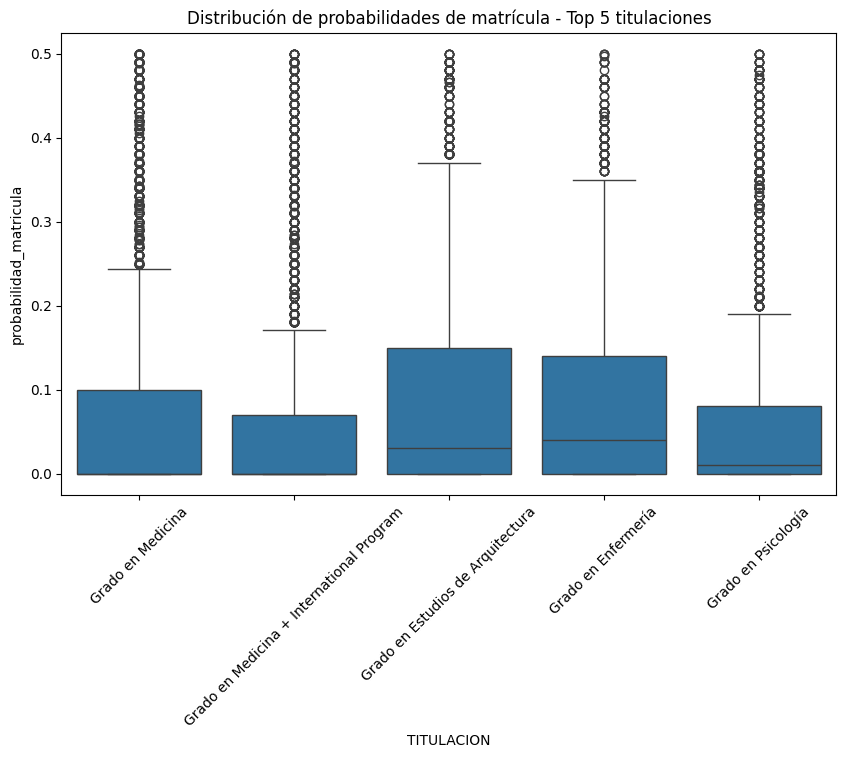

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo el top 5
df_top5 = df_grado[df_grado['TITULACION'].isin(top5_titulaciones)]

plt.figure(figsize=(10,6))
sns.boxplot(x='TITULACION', y='probabilidad_matricula', data=df_top5)
plt.title('Distribución de probabilidades de matrícula - Top 5 titulaciones')
plt.xticks(rotation=45)
plt.show()


Para la interpretación del gráfico:
- Eje Y: Probabilidad de matrícula asignada por el modelo.
- Eje X: Las 5 titulaciones con más registros.
- Las cajas muestran el rango intercuartílico (Q1–Q3) y la línea central es la mediana.
- Los puntos fuera de las “bigotes” son valores atípicos (outliers).

Observaciones:
1. Medicina y el International Program tienen medianas de probabilidad más bajas → el modelo es más conservador en estas titulaciones.

2. Arquitectura y Enfermería tienen medianas más altas → el modelo asigna más probabilidad de matrícula en general.

3. Hay bastante dispersión en todas las titulaciones, lo que indica que el modelo no siempre está “seguro” y varía mucho según el caso.

### 3. Comprobar el pocentaje de acierto y el AUC por Etapa y Subetapa (concatenadas). ¿Va aumentando conforme las etapas se van acercando a la matriculación?

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

def calcular_auc_safe(y_true, y_prob):
    if len(set(y_true)) < 2:
        return None
    return roc_auc_score(y_true, y_prob)

# Filtrar subetapas no nulas
df_filtrado = df_grado[df_grado['PL_SUBETAPA'].notna()]

# Construir resultados sin usar groupby.apply
resultados = []
for subetapa, grupo in df_filtrado.groupby('PL_SUBETAPA'):
    acc = accuracy_score(grupo['target'], grupo['prediction_label'])
    auc_val = calcular_auc_safe(grupo['target'], grupo['probabilidad_matricula'])
    registros = len(grupo)
    resultados.append({
        'PL_SUBETAPA': str(subetapa),
        'accuracy': round(acc, 4),
        'auc': "No calculable" if auc_val is None else round(auc_val, 4),
        'registros': registros
    })

# Crear DataFrame
resultados_subetapas = pd.DataFrame(resultados)

# Ordenar alfabéticamente
resultados_subetapas = resultados_subetapas.sort_values('PL_SUBETAPA')

# Mostrar tabla limpia
resultados_subetapas


,PL_SUBETAPA,accuracy,auc,registros
0,0,0.9912,No calculable,15596
1,Completa,1.0000,No calculable,4
2,Convocado,1.0000,No calculable,16
3,Desmatriculado,0.2159,No calculable,3890
4,Enviada,0.3333,No calculable,15
5,Formalizada,0.9249,0.4166,49118
6,Incompleta,0.9971,No calculable,340
7,Inicio,0.8096,No calculable,2248
8,Matriculado parcialmente,0.4316,No calculable,1812
9,No formalizada,0.6522,No calculable,92


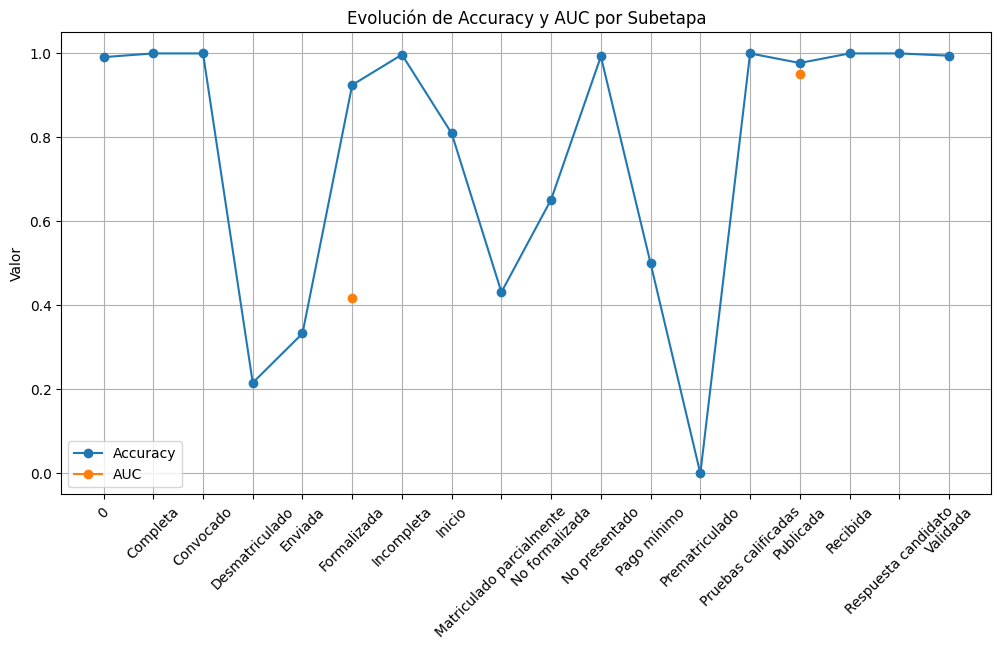

In [7]:
import matplotlib.pyplot as plt

# Filtrar solo las subetapas con AUC calculable numérico
df_plot = resultados_subetapas.copy()
df_plot['auc'] = pd.to_numeric(df_plot['auc'], errors='coerce')

plt.figure(figsize=(12,6))
plt.plot(df_plot['PL_SUBETAPA'], df_plot['accuracy'], marker='o', label='Accuracy')
plt.plot(df_plot['PL_SUBETAPA'], df_plot['auc'], marker='o', label='AUC')
plt.xticks(rotation=45)
plt.ylabel('Valor')
plt.title('Evolución de Accuracy y AUC por Subetapa')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\0021878\AppData\Local\Temp\ipykernel_21636\1402386491.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_plot, x='PL_SUBETAPA', y='accuracy', marker='o', label='Accuracy', ci=None)
C:\Users\0021878\AppData\Local\Temp\ipykernel_21636\1402386491.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_plot, x='PL_SUBETAPA', y='auc', marker='o', label='AUC', ci=None)


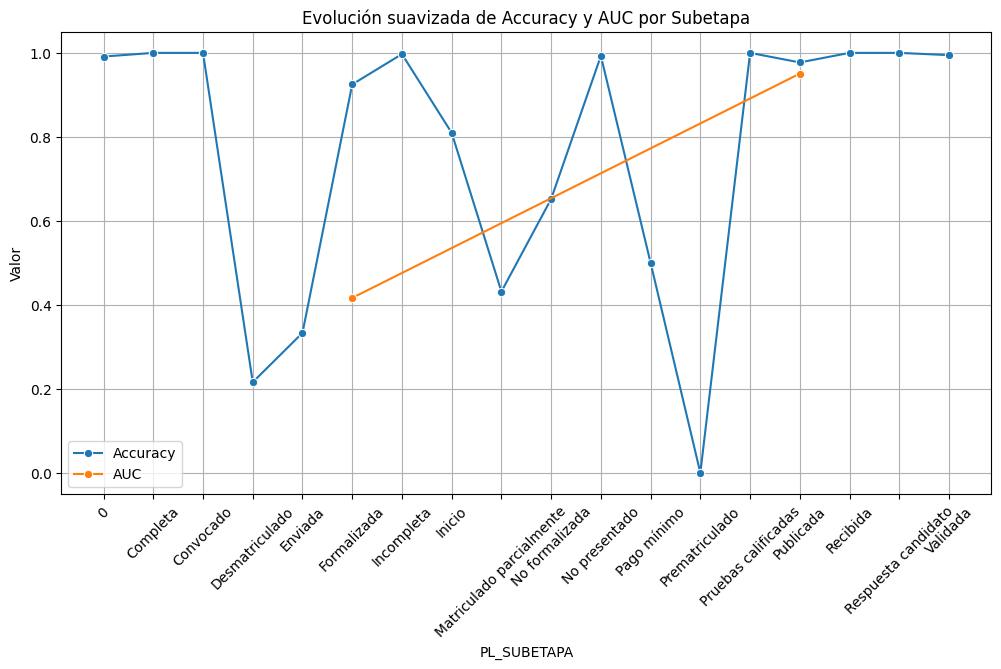

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir AUC a numérico para graficar
df_plot = resultados_subetapas.copy()
df_plot['auc'] = pd.to_numeric(df_plot['auc'], errors='coerce')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='PL_SUBETAPA', y='accuracy', marker='o', label='Accuracy', ci=None)
sns.lineplot(data=df_plot, x='PL_SUBETAPA', y='auc', marker='o', label='AUC', ci=None)
plt.xticks(rotation=45)
plt.ylabel('Valor')
plt.title('Evolución suavizada de Accuracy y AUC por Subetapa')
plt.grid(True)
plt.legend()
plt.show()


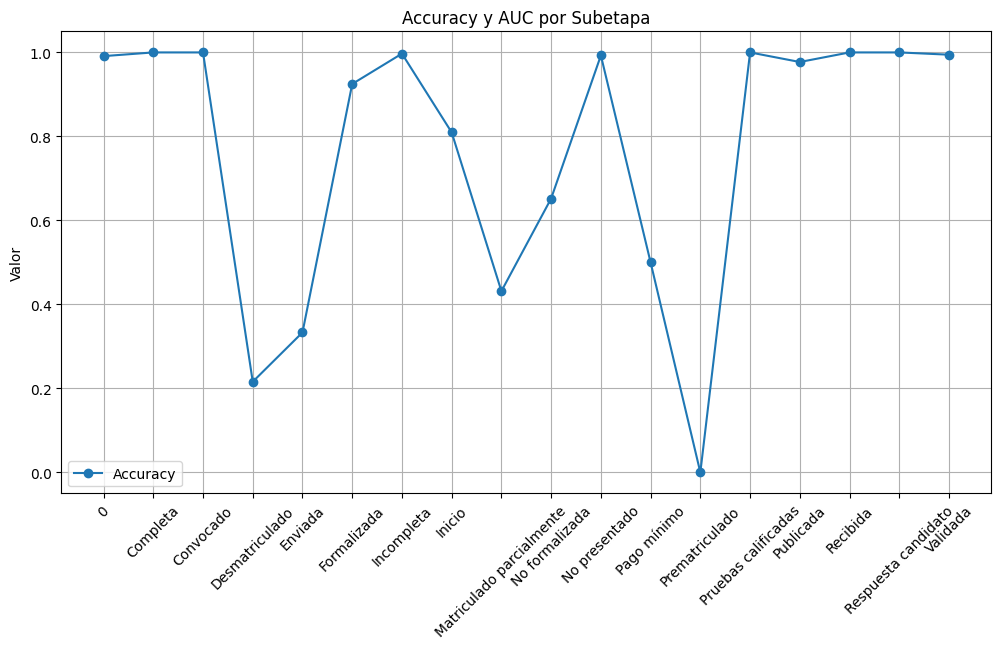

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(resultados_subetapas['PL_SUBETAPA'], resultados_subetapas['accuracy'], marker='o', label='Accuracy')
#plt.plot(resultados_subetapas['PL_SUBETAPA'], resultados_subetapas['auc'], marker='o', label='AUC')
plt.xticks(rotation=45)
plt.ylabel('Valor')
plt.title('Accuracy y AUC por Subetapa')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Concatenar etapa y subetapa
df_grado['Etapa_Subetapa'] = df_grado['STAGENAME'].astype(str) + " - " + df_grado['PL_SUBETAPA'].astype(str)


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

def calcular_auc_safe(y_true, y_prob):
    if len(set(y_true)) < 2:
        return None
    return roc_auc_score(y_true, y_prob)

# Filtrar filas con etapa y subetapa no nulas
df_filtrado = df_grado[df_grado['STAGENAME'].notna() & df_grado['PL_SUBETAPA'].notna()]

# Calcular métricas
resultados_etapas = []
for combo, grupo in df_filtrado.groupby('Etapa_Subetapa'):
    acc = accuracy_score(grupo['target'], grupo['prediction_label'])
    auc_val = calcular_auc_safe(grupo['target'], grupo['probabilidad_matricula'])
    registros = len(grupo)
    resultados_etapas.append({
        'Etapa_Subetapa': combo,
        'accuracy': round(acc, 4),
        'auc': "No calculable" if auc_val is None else round(auc_val, 4),
        'registros': registros
    })

resultados_etapas = pd.DataFrame(resultados_etapas).sort_values('Etapa_Subetapa')
resultados_etapas


,Etapa_Subetapa,accuracy,auc,registros
0,Cerrada/Perdida - 0,0.9879,No calculable,10799
1,Cerrada/Perdida - Pruebas calificadas,1.0000,No calculable,6
2,Comisión de estudios de postgrado - Recibida,1.0000,No calculable,18
3,Comisión de estudios de postgrado - Validada,1.0000,No calculable,79
4,Enviada - 0,1.0000,No calculable,11
5,Estudio Centro - Recibida,1.0000,No calculable,294
6,Inicio - 0,0.9985,No calculable,4773
7,Matrícula Admisión - Desmatriculado,0.2159,No calculable,3890
8,Matrícula Admisión - Enviada,0.3333,No calculable,15
9,Matrícula Admisión - Inicio,0.8096,No calculable,2248


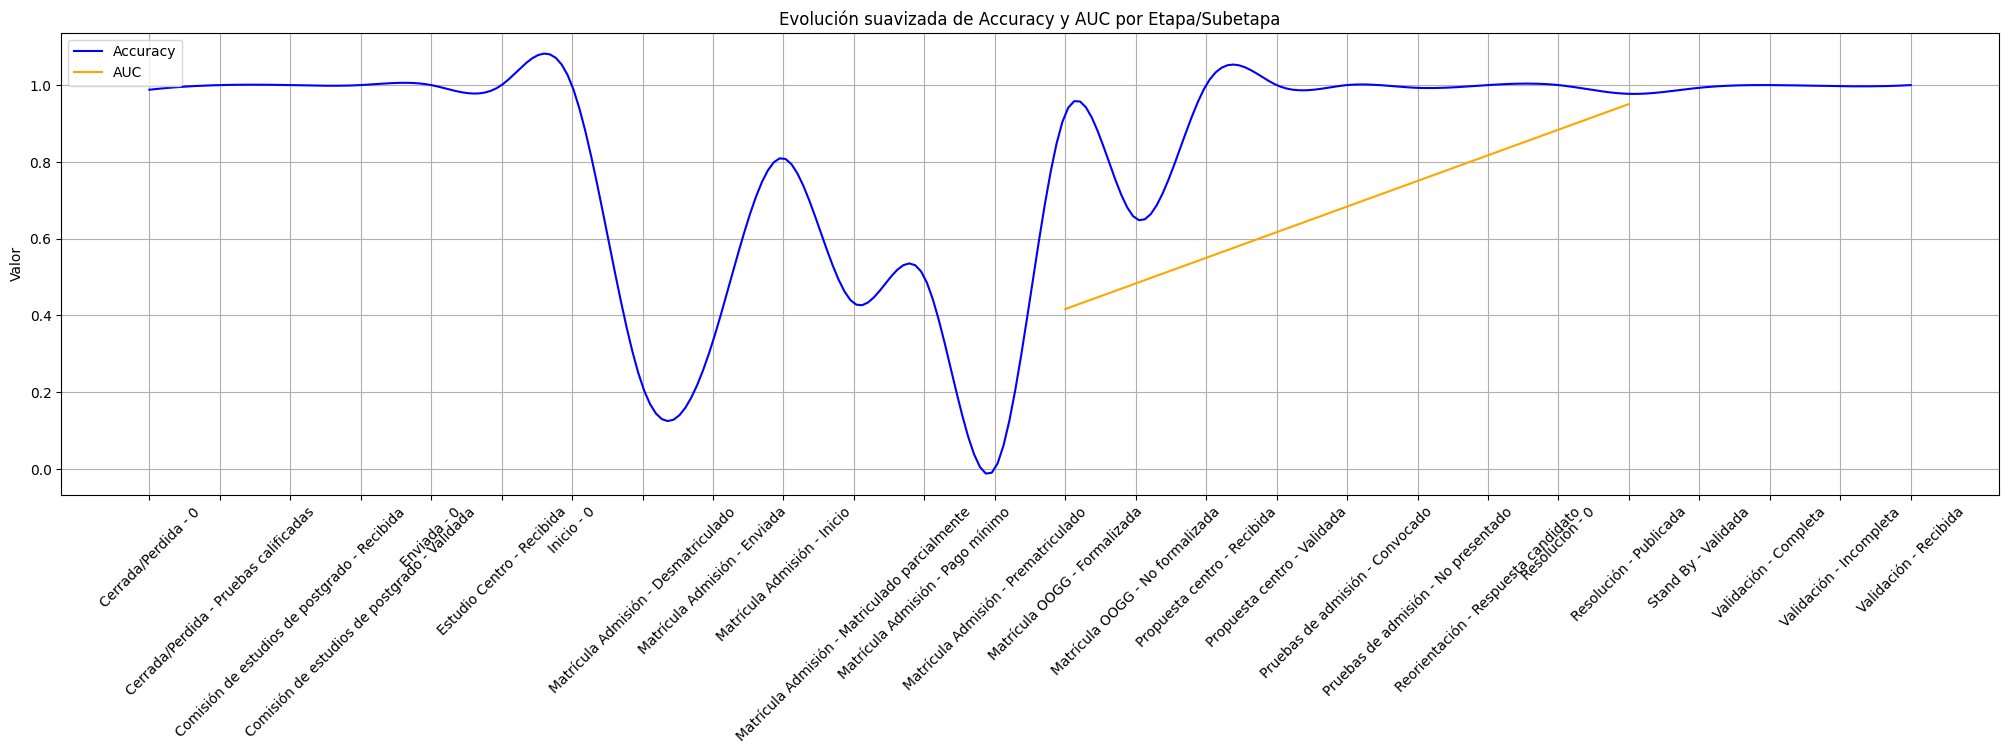

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import pandas as pd

# Convertir AUC a numérico para graficar
df_plot = resultados_etapas.copy()
df_plot['auc'] = pd.to_numeric(df_plot['auc'], errors='coerce')

# Índices para interpolar
x = np.arange(len(df_plot))
x_new = np.linspace(x.min(), x.max(), 300)

# --- Suavizado para accuracy ---
if len(df_plot['accuracy']) >= 4:
    spl_acc = make_interp_spline(x, df_plot['accuracy'], k=3)
    acc_smooth = spl_acc(x_new)
else:
    acc_smooth = df_plot['accuracy']
    x_new = x  # usamos los puntos originales

# --- Suavizado para AUC (ignorando NaN) ---
mask_auc = ~df_plot['auc'].isna()
x_auc = x[mask_auc]
y_auc = df_plot['auc'][mask_auc]

if len(x_auc) >= 4:
    spl_auc = make_interp_spline(x_auc, y_auc, k=3)
    auc_smooth = spl_auc(np.linspace(x_auc.min(), x_auc.max(), 300))
    x_auc_smooth = np.linspace(x_auc.min(), x_auc.max(), 300)
else:
    auc_smooth = y_auc
    x_auc_smooth = x_auc

# --- Graficar ---
plt.figure(figsize=(25,6))
plt.plot(x_new, acc_smooth, label='Accuracy', color='blue')
plt.plot(x_auc_smooth, auc_smooth, label='AUC', color='orange')
plt.xticks(x, df_plot['Etapa_Subetapa'], rotation=45)
plt.ylabel('Valor')
plt.title('Evolución suavizada de Accuracy y AUC por Etapa/Subetapa')
plt.grid(True)
plt.legend()
plt.show()


### 4. Comprobar el pocentaje de acierto por el top 5 de titulaciones con más oportunidades ¿Acierta muchos en las titulaciones como Medicina, Enfermería, etc?

In [29]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Top 5 titulaciones con más registros
top5_titulaciones = df_grado['TITULACION'].value_counts().head(5).index

# Filtrar solo esas titulaciones
df_top5 = df_grado[df_grado['TITULACION'].isin(top5_titulaciones)]

# Calcular accuracy por titulación sin usar groupby.apply
resultados = []
for titulacion, grupo in df_top5.groupby('TITULACION'):
    acc = round(accuracy_score(grupo['target'], grupo['prediction_label']), 4)
    registros = len(grupo)
    resultados.append({
        'TITULACION': titulacion,
        'accuracy': acc,
        'registros': registros
    })

# Crear DataFrame limpio
resultados_top5_accuracy = pd.DataFrame(resultados).sort_values('accuracy', ascending=False)

# Mostrar tabla
resultados_top5_accuracy


,TITULACION,accuracy,registros
4,Grado en Psicología,0.9456,3765
3,Grado en Medicina + International Program,0.9370,4956
1,Grado en Estudios de Arquitectura,0.9164,3338
0,Grado en Enfermería,0.9094,3112
2,Grado en Medicina,0.8965,7896


In [26]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Top 5 titulaciones con más registros
top5_titulaciones = df_grado['TITULACION'].value_counts().head(5).index

# Filtrar solo esas titulaciones
df_top5 = df_grado[df_grado['TITULACION'].isin(top5_titulaciones)]

# Calcular accuracy por titulación sin usar groupby.apply
resultados = []
for titulacion, grupo in df_top5.groupby('TITULACION'):
    acc = round(accuracy_score(grupo['target'], grupo['prediction_label']), 4)
    registros = len(grupo)
    resultados.append({
        'TITULACION': titulacion,
        'accuracy': acc,
        'registros': registros
    })

# Crear DataFrame limpio
resultados_top5_accuracy = pd.DataFrame(resultados).sort_values('registros', ascending=False)

# Mostrar tabla
resultados_top5_accuracy


,TITULACION,accuracy,registros
2,Grado en Medicina,0.8965,7896
3,Grado en Medicina + International Program,0.9370,4956
4,Grado en Psicología,0.9456,3765
1,Grado en Estudios de Arquitectura,0.9164,3338
0,Grado en Enfermería,0.9094,3112


#### Orden por registros

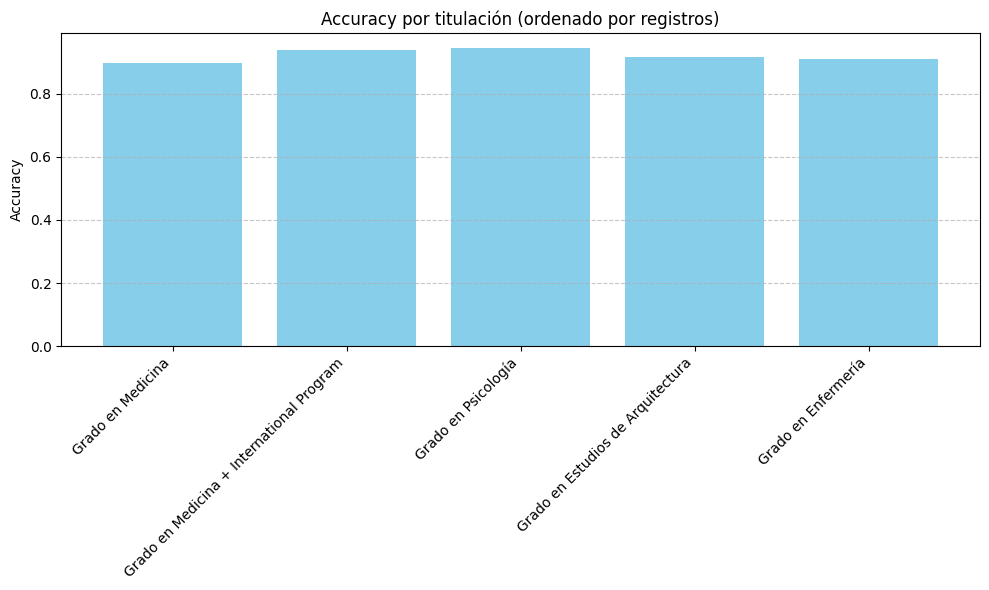

In [27]:
import matplotlib.pyplot as plt

# Gráfico por registros
plt.figure(figsize=(10,6))
plt.bar(resultados_top5_accuracy['TITULACION'], resultados_top5_accuracy['accuracy'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy por titulación (ordenado por registros)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Orden por accuracy

In [39]:
# Gráfico por accuracy
plt.figure(figsize=(10,6))
plt.bar(resultados_top5_accuracy_acc['TITULACION'], resultados_top5_accuracy_acc['accuracy'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy por titulación (ordenado por accuracy)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'resultados_top5_accuracy_acc' is not defined

<Figure size 1000x600 with 0 Axes>

### 5. Comprobar las titulaciones con menos porcentaje de acierto. ¿En las que falla, es porque hay pocas oportunidades?

Pregunta: ¿En las que falla, es porque hay pocas oportunidades?

Respuesta: A raíz de la tabla resultante, diría que si.

In [30]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Calcular accuracy por titulación
resultados_todas = []
for titulacion, grupo in df_grado.groupby('TITULACION'):
    acc = round(accuracy_score(grupo['target'], grupo['prediction_label']), 4)
    registros = len(grupo)
    resultados_todas.append({
        'TITULACION': titulacion,
        'accuracy': acc,
        'registros': registros
    })

# Crear DataFrame y ordenar por accuracy ascendente
resultados_todas_df = pd.DataFrame(resultados_todas).sort_values('accuracy', ascending=True)

# Mostrar las 10 titulaciones con menor accuracy
resultados_todas_df.head(10)


,TITULACION,accuracy,registros
1,Alumno extraordinario (Facultad Eclesiástica d...,0.0,24
6,Alumno extraordinario (Facultad de Farmacia-Gr...,0.0,6
5,Alumno extraordinario (Facultad de Derecho-Grado),0.0,6
4,Alumno extraordinario (Facultad de Comunicació...,0.0,3
7,Alumno extraordinario (Facultad de Teología-Gr...,0.0,3
9,Bachiller en Ciencias Religiosas,0.0,9
11,Complementos de formación del máster ejecutivo...,0.0,15
38,Grado en Administración y Dirección de Empresa...,0.0,3
42,Grado en Administración y Dirección de Empresa...,0.0,3
64,Grado en Economía + Diploma en Governance,0.0,3


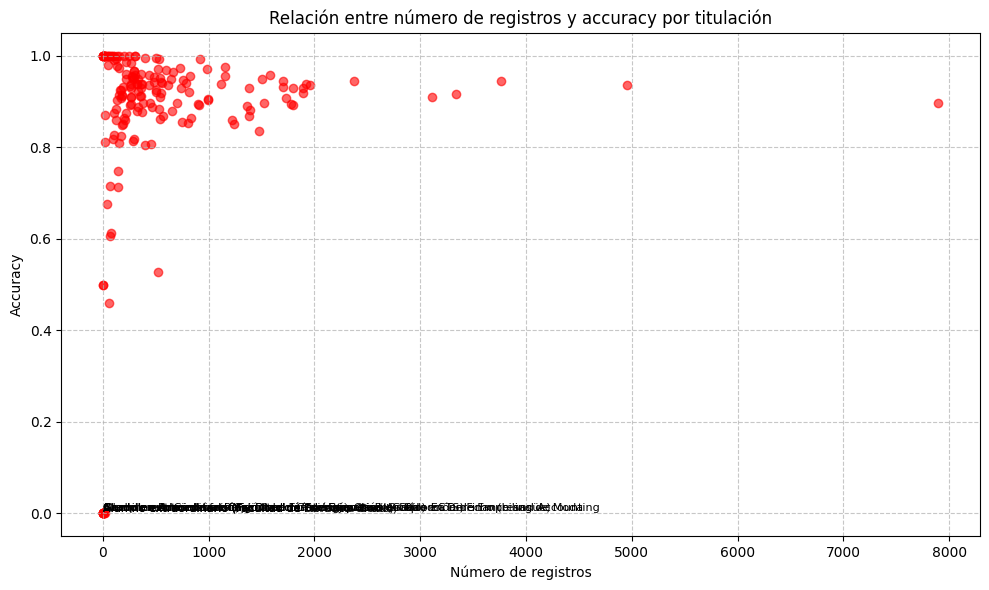

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(resultados_todas_df['registros'], resultados_todas_df['accuracy'], color='red', alpha=0.6)

# Etiquetas de los puntos más relevantes (por ejemplo, los 10 con menor accuracy)
for i, row in resultados_todas_df.head(10).iterrows():
    plt.text(row['registros']+0.2, row['accuracy']+0.005, row['TITULACION'], fontsize=8)

plt.xlabel('Número de registros')
plt.ylabel('Accuracy')
plt.title('Relación entre número de registros y accuracy por titulación')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


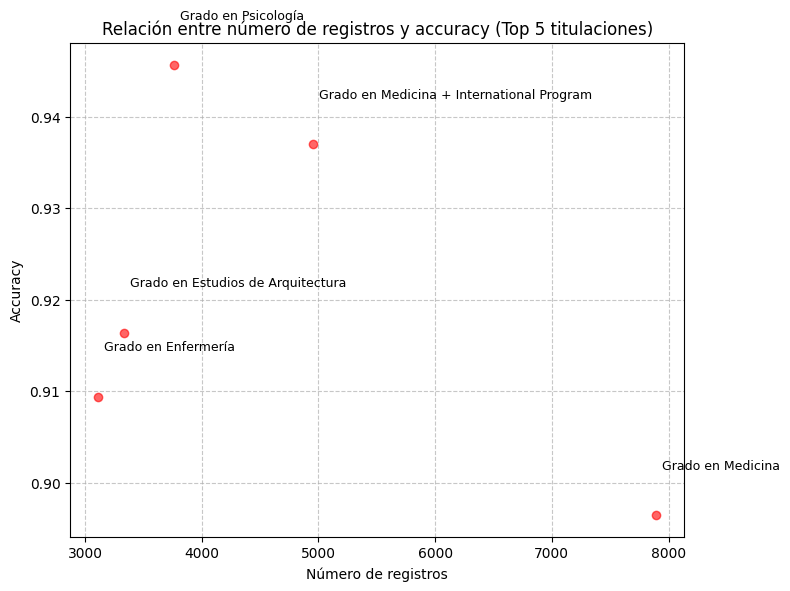

In [36]:
import matplotlib.pyplot as plt

# Top 5 titulaciones con más registros
top5_titulaciones = resultados_todas_df.sort_values('registros', ascending=False).head(5)

plt.figure(figsize=(8,6))
plt.scatter(top5_titulaciones['registros'], top5_titulaciones['accuracy'], color='red', alpha=0.6)

# Etiquetas para cada punto
for i, row in top5_titulaciones.iterrows():
    plt.text(row['registros']+50, row['accuracy']+0.005, row['TITULACION'], fontsize=9)

plt.xlabel('Número de registros')
plt.ylabel('Accuracy')
plt.title('Relación entre número de registros y accuracy (Top 5 titulaciones)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


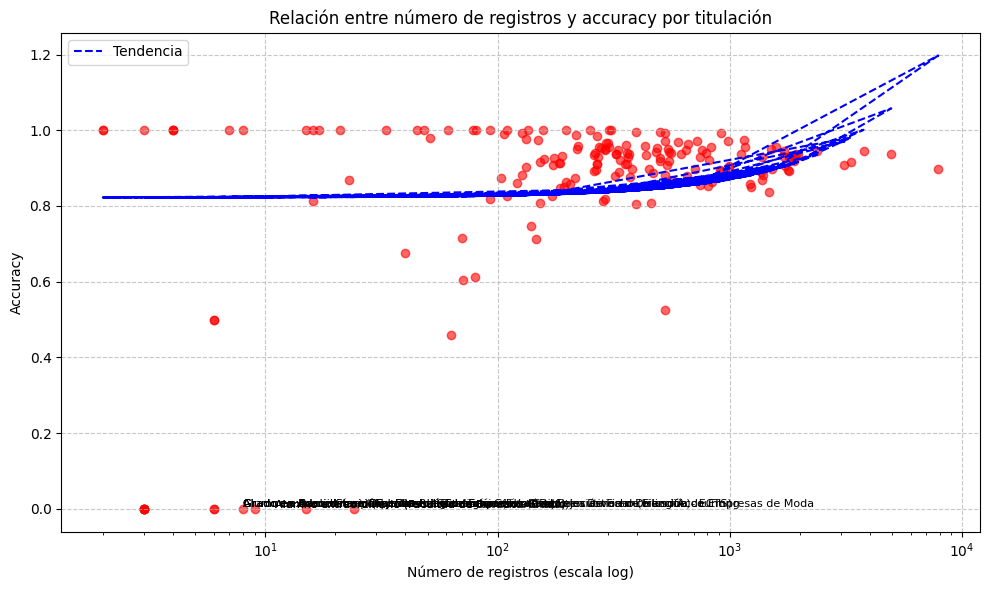

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,6))
plt.scatter(resultados_todas_df['registros'], resultados_todas_df['accuracy'], color='red', alpha=0.6)

# Etiquetas solo para los 10 con menor accuracy
for i, row in resultados_todas_df.head(10).iterrows():
    plt.text(row['registros']+5, row['accuracy']+0.005, row['TITULACION'], fontsize=8)

# Línea de tendencia
X = resultados_todas_df['registros'].values.reshape(-1,1)
y = resultados_todas_df['accuracy'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.plot(resultados_todas_df['registros'], y_pred, color='blue', linestyle='--', label='Tendencia')

plt.xscale('log')  # escala logarítmica para separar mejor los puntos
plt.xlabel('Número de registros (escala log)')
plt.ylabel('Accuracy')
plt.title('Relación entre número de registros y accuracy por titulación')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
